In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('smtph_total.csv')
df.head(5)

,Title,Link,Description,Blogger Name,Blogger Link,Post Date,Post Contents
0,"갤럭시 Z 플립과 한 달, 접는 스마트폰의 가치만 남다",https://chitsol.com/entry/galaxy_z_flip_review/,반으로 접을 수 있는 갤럭시 Z 플립이 접지 않는 스마트폰과 얼마나 다른 경험인가를...,https://chitsol.com/,https://chitsol.com/,20210712,NaN
1,스마트폰 삼각대 추천 내돈내산 리뷰,https://blog.naver.com/kimhw1020?Redirect=Log&...,그래서 스마트폰 삼각대 추천 하는 제품을 구매하게 된 것 같아요. 2018년 4월 ...,진돗개 솜이랑 언니랑,https://blog.naver.com/kimhw1020,20210720,\n\n\n\n\n\n\n솜이언니 일상\n\n\n\n\n스마트폰 삼각대 추천 내돈내...
2,귀여운 스마트폰 거치대 + 아이폰 케이스(다이소 비교),https://blog.naver.com/logix200?Redirect=Log&l...,스마트폰 거치대 홀더 &quot;아이폰 케이스도 졸.귀.탱&quot; 안녕하세요. ...,옥희돌이 칩시크족,https://blog.naver.com/logix200,20210802,\n\n\n\n\n\n\n일반 수령기\n\n\n\n\n귀여운 스마트폰 거치대 + 아...
3,"베스틴 원패스 스마트폰 어플, 아이파크 공동 현관문 핸드폰 연동",https://blog.naver.com/july7th73?Redirect=Log&...,"요즘 신축 아파트들은 대부분 IoT 스마트 기기들을 이용한 출입시스템을 도입, 각종...",수연아빠의 야구장 출동 (개포맘모스),https://blog.naver.com/july7th73,20210816,\n\n\n\n\n\n\n파워리뷰즐기기\n\n\n\n\n베스틴 원패스 스마트폰 어플...
4,대전스마트폰복구 삭제나 고장도 걱정없이,https://blog.naver.com/jcy0207?Redirect=Log&lo...,바쁜 현대인들의 곁에서 어디서든 일상을 함께하는 스마트폰은 한순간도 뗄레야 뗄 수 ...,모아의 교육정보 모아모아,https://blog.naver.com/jcy0207,20210609,\n\n안녕하세요 모아입니다.바쁜 현대인들의 곁에서어디서든 일상을 함께하는 스마트폰...


In [ ]:
df.columns

Index(['Title', 'Link', 'Description', 'Blogger Name', 'Blogger Link',
       'Post Date', 'Post Contents'],
      dtype='object')

In [ ]:
posts = df['Title']+['Description']
type(posts)

pandas.core.series.Series

In [ ]:
!python3 -m pip install konlpy

     |████████████████████████████████| 19.4 MB 5.7 MB/s 
     |████████████████████████████████| 448 kB 60.8 MB/s 
     |████████████████████████████████| 86 kB 3.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import Okt
tagger = Okt()

In [ ]:
# 불용어 제거
stop_words = ['강,', '글,', '애', '미', '번', '은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹', '때', '만', '원', '이때', '개']

In [ ]:
posts_noun = []
for post in posts:
  # print(tagger.nouns(post))
  for noun in tagger.nouns(post):
    posts_noun.append(noun)

len(posts_noun), type(posts_noun)

(6083, list)

In [ ]:
from collections import Counter

In [ ]:
noun_counter = Counter(posts_noun)
type(noun_counter)

collections.Counter

In [ ]:
top_30_nouns = noun_counter.most_common(30)
type(top_30_nouns), top_30_nouns

(list,
 [('스마트폰', 1021),
  ('갤럭시', 104),
  ('삼성', 80),
  ('스펙', 73),
  ('사용', 71),
  ('강의', 71),
  ('강', 70),
  ('동영상', 67),
  ('제작', 66),
  ('카메라', 61),
  ('방법', 60),
  ('유튜브', 60),
  ('위', 55),
  ('출시', 46),
  ('사진', 42),
  ('가격', 38),
  ('앱', 37),
  ('삼각대', 35),
  ('폰', 34),
  ('안드로이드', 34),
  ('보급', 34),
  ('샤오미', 32),
  ('거치', 31),
  ('활용', 29),
  ('후기', 27),
  ('용', 26),
  ('중독', 24),
  ('법', 23),
  ('촬영', 22),
  ('게이', 22)])

In [ ]:
# 딕셔너리로 변환
top_nouns_dict = dict(top_30_nouns)
type(top_nouns_dict)

dict

In [ ]:
from wordcloud import WordCloud

In [ ]:
nouns_wordcloud = WordCloud()

In [ ]:
nouns_wordcloud.generate_from_frequencies(top_nouns_dict)

In [ ]:
import matplotlib.pyplot as plt

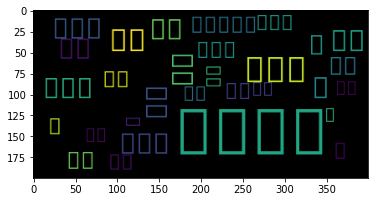

In [ ]:
plt.imshow(nouns_wordcloud)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]


In [ ]:
countvectorizer = CountVectorizer()
countvectorizer.fit_transform(corpus).toarray()

array([[0, 1, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0]])

In [ ]:
countvectorizer.vocabulary_

{'do': 0,
 'know': 1,
 'like': 2,
 'love': 3,
 'should': 4,
 'want': 5,
 'what': 6,
 'you': 7,
 'your': 8}

# Word2Vec

In [ ]:
from gensim.models import Word2Vec

In [ ]:
word2vec = Word2Vec([posts_noun], min_count=10)
word2vec

In [ ]:
word2vec.wv.most_similar('갤럭시')

[('스마트폰', 0.999895453453064),
 ('스펙', 0.9998244047164917),
 ('출시', 0.9998209476470947),
 ('위', 0.9998119473457336),
 ('사용', 0.9998078346252441),
 ('강', 0.9997989535331726),
 ('제작', 0.9997930526733398),
 ('카메라', 0.9997901320457458),
 ('강의', 0.9997848272323608),
 ('안드로이드', 0.9997628927230835)]